In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2024 Imperial - AI/ML professional certificate - Captstone - Project - Data Exploration

## Stellar calssifiation from telescope observations

### Datacard
The data consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

* obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
* alpha = Right Ascension angle (at J2000 epoch)
* delta = Declination angle (at J2000 epoch)
* u = Ultraviolet filter in the photometric system
* g = Green filter in the photometric system
* r = Red filter in the photometric system
* i = Near Infrared filter in the photometric system
* z = Infrared filter in the photometric system
* run_ID = Run Number used to identify the specific scan
* rereun_ID = Rerun Number to specify how the image was processed
* cam_col = Camera column to identify the scanline within the run
* field_ID = Field number to identify each field
* spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
* class = object class (galaxy, star or quasar object)
* redshift = redshift value based on the increase in wavelength
* plate = plate ID, identifies each plate in SDSS
* MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
* fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation


<b>Citation</b>
* fedesoriano. (January 2022). Stellar Classification Dataset - SDSS17. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/stellar-classification-dataset-sdss17.

* https://www.sdss4.org/faceplat/

<b>Acknowledgements</b>
The data released by the SDSS is under public domain. Its taken from the current data release RD17. More information about the license: http://www.sdss.org/science/image-gallery/

<b>SDSS Publications</b>

Abdurro’uf et al., The Seventeenth data release of the Sloan Digital Sky Surveys: Complete Release of MaNGA, MaStar and APOGEE-2 DATA (Abdurro’uf et al. submitted to ApJS) [arXiv:2112.02026]


### Data Exploration and cleaning

#### Original Data

In [2]:
original_data = pd.read_csv('./data/star_classification.csv')

In [3]:
# data shape
print([val for val in original_data.columns])

print(original_data.shape)

['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift', 'plate', 'MJD', 'fiber_ID']
(100000, 18)


<b>Are the classifications unique by primary key?</b>

In [4]:
# obejcts are not unique
unique_obj = original_data.groupby(by='obj_ID').agg({'class':'unique'}).reset_index()

def _class_len(r):
    return len(r)

unique_obj['class_len'] = unique_obj['class'].apply(_class_len)

# we have same object with multiple classifications, 5555
multi_classifications = unique_obj[ unique_obj['class_len'] > 1 ]

# lets understand if we should remove them if there is error in data
# or if this correct
exmaple_obj = multi_classifications.obj_ID.iloc[0]

In [5]:
original_data[original_data.obj_ID == exmaple_obj]

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
24820,1.237646e+18,57.598932,0.063617,22.81235,21.48987,20.04629,19.59547,18.99735,109,301,4,153,1.838733e+18,GALAXY,0.241813,1633,52998,502
45488,1.237646e+18,57.647253,0.030695,19.73725,19.48620,19.04919,18.85514,18.79748,109,301,4,153,1.398504e+18,QSO,1.429148,1242,52901,494


Reading: https://skyserver.sdss.org/dr18/MoreTools/browser, which explains the schema indeed obj_id is the photo id in the databse. The object inside the oject is indexed by other keys such as its location. spec_obj_ID is required to be unqiue. Lets check that


In [6]:
# spec_obj_ID are all unique
# no need to remove any data
print(len(np.unique(original_data['spec_obj_ID'].values)))



100000


In [7]:
# there are no nan values
original_data.isna().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [8]:
# lets remove some uncessary columns 
# we remove the ID columns
# this is the features we want to keep
relevant_data = original_data[['alpha', 'delta' , 'u', 'g', 'r', 'i', 'z', 'redshift', 'class']]

#### Examine output calss

In [9]:
# output is an object (string)
print(relevant_data['class'].dtype)

relevant_data['class'].unique()

object


array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [10]:
relevant_data['class'].value_counts()

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

#### Examine input feaures

In [11]:

relevant_data.describe().T

,count,mean,std,min,25%,50%,75%,max
alpha,100000.0,177.629117,96.502241,0.005528,127.518222,180.900700,233.895005,359.999810
delta,100000.0,24.135305,19.644665,-18.785328,5.146771,23.645922,39.901550,83.000519
u,100000.0,21.980468,31.769291,-9999.000000,20.352353,22.179135,23.687440,32.781390
g,100000.0,20.531387,31.750292,-9999.000000,18.965230,21.099835,22.123767,31.602240
r,100000.0,19.645762,1.854760,9.822070,18.135828,20.125290,21.044785,29.571860
i,100000.0,19.084854,1.757895,9.469903,17.732285,19.405145,20.396495,32.141470
z,100000.0,18.668810,31.728152,-9999.000000,17.460677,19.004595,19.921120,29.383740
redshift,100000.0,0.576661,0.730707,-0.009971,0.054517,0.424173,0.704154,7.011245


Two observations of above data

* We will need normalization before feeding to models, big variation magnitudes
* features u,g and z seems to have some values -9999, we need to explore these anomalies are perhaps remove them

Text(0.5, 1.0, 'z - infra red fitler')

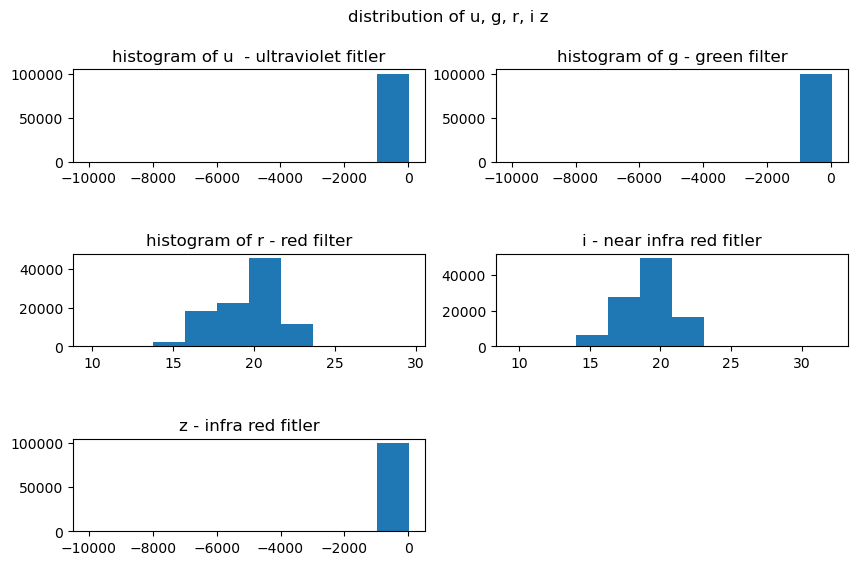

In [12]:
fig = plt.figure(figsize=(10,6))
fig.subplots_adjust(hspace=1)
fig.suptitle('distribution of u, g, r, i z')

u_ax = fig.add_subplot(3,2,1)
u_ax.hist(relevant_data['u'])
u_ax.set_title('histogram of u  - ultraviolet fitler')

g_ax = fig.add_subplot(3,2,2)
g_ax.hist(relevant_data['g'])
g_ax.set_title('histogram of g - green filter')

r_ax = fig.add_subplot(3,2,3)
r_ax.hist(relevant_data['r'])
r_ax.set_title('histogram of r - red filter')

i_ax = fig.add_subplot(3,2,4)
i_ax.hist(relevant_data['i'])
i_ax.set_title('i - near infra red fitler')

z_ax = fig.add_subplot(3,2,5)
z_ax.hist(relevant_data['z'])
z_ax.set_title('z - infra red fitler')
 


In [13]:
# lets find values of interest
relevant_data[relevant_data.u < 20.352353].sort_values(by='u').head(3)

,alpha,delta,u,g,r,i,z,redshift,class
79543,224.006526,-0.624304,-9999.00000,-9999.00000,18.16560,18.01675,-9999.00000,0.000089,STAR
57763,208.358688,33.825699,10.99623,13.66217,12.35763,12.63744,11.30247,3.955592,QSO
75784,239.473361,27.594369,12.10168,10.49820,10.11604,10.00865,10.44131,0.000008,STAR


In [14]:
# lets find values of interest
relevant_data[relevant_data.g < 20.352353].sort_values(by='g').head(3)

,alpha,delta,u,g,r,i,z,redshift,class
79543,224.006526,-0.624304,-9999.00000,-9999.00000,18.16560,18.01675,-9999.00000,0.000089,STAR
75784,239.473361,27.594369,12.10168,10.49820,10.11604,10.00865,10.44131,0.000008,STAR
4472,239.423127,28.548438,12.26240,10.51139,10.06854,13.41786,10.22551,0.000025,STAR


In [15]:
# lets find values of interest
relevant_data[relevant_data.z < 20.352353].sort_values(by='z').head(3)

,alpha,delta,u,g,r,i,z,redshift,class
79543,224.006526,-0.624304,-9999.00000,-9999.00000,18.16560,18.016750,-9999.000000,0.000089,STAR
14498,84.230172,7.138590,14.15199,10.73097,9.82207,9.469903,9.612333,0.000051,STAR
4472,239.423127,28.548438,12.26240,10.51139,10.06854,13.417860,10.225510,0.000025,STAR


In [16]:
# one row seems bad,lets remove it
rows_to_drop = relevant_data[ (relevant_data.u <= -9999) | (relevant_data.g <= -9999) | (relevant_data.r <= -9999) ].index
rows_to_drop

Index([79543], dtype='int64')

In [17]:
relevant_data = relevant_data.drop(index=rows_to_drop)

In [18]:
relevant_data.describe().T

,count,mean,std,min,25%,50%,75%,max
alpha,99999.0,177.628653,96.502612,0.005528,127.517698,180.900527,233.895005,359.999810
delta,99999.0,24.135552,19.644608,-18.785328,5.147477,23.646462,39.901582,83.000519
u,99999.0,22.080679,2.251068,10.996230,20.352410,22.179140,23.687480,32.781390
g,99999.0,20.631583,2.037384,10.498200,18.965240,21.099930,22.123775,31.602240
r,99999.0,19.645777,1.854763,9.822070,18.135795,20.125310,21.044790,29.571860
i,99999.0,19.084865,1.757900,9.469903,17.732280,19.405150,20.396510,32.141470
z,99999.0,18.768988,1.765982,9.612333,17.460830,19.004600,19.921120,29.383740
redshift,99999.0,0.576667,0.730709,-0.009971,0.054522,0.424176,0.704172,7.011245


In [19]:
FEATURE_COLS = [ 'u', 'g', 'r', 'i', 'z', 'redshift']
OUTPUT_COL = ['class']
cleaned_features = relevant_data[FEATURE_COLS]
cleaned_output = relevant_data[OUTPUT_COL]

## Save the data

In [20]:
cleaned_features.to_csv('./data/star_classification_cleaned_features.csv')
cleaned_output.to_csv('./data/star_classification_cleaned_output.csv')

## Normalize the data

In [21]:
from sklearn.preprocessing import StandardScaler
normalized_features = pd.DataFrame(data=StandardScaler().fit_transform(cleaned_features), columns=FEATURE_COLS)
normalized_features.head()

,u,g,r,i,z,redshift
0,0.798798,0.806782,0.403953,0.046001,0.013999,0.079549
1,1.198064,1.079967,1.584395,1.185087,1.611170,0.277088
2,1.413732,0.997513,0.519736,0.150012,0.101520,0.092415
3,0.024940,1.543642,1.059894,0.807601,0.272435,0.486761
4,-1.174337,-1.497665,-1.697426,-1.767888,-1.825836,-0.630273


In [22]:
normalized_output = pd.DataFrame(data=cleaned_output['class'].replace(to_replace=['GALAXY', 'QSO', 'STAR'], value=[1,2,3]), columns=['class'])

normalized_output['class'].value_counts()

class
1    59445
3    21593
2    18961
Name: count, dtype: int64

In [23]:
normalized_features.to_csv('./data/star_classification_cleaned_norm_features.csv')
normalized_output.to_csv('./data/star_classification_cleaned_norm_output.csv')



### Show the correlation

In [26]:
corr = normalized_features.corr()
corr.style.background_gradient(cmap='coolwarm')

,u,g,r,i,z,redshift
u,1.000000,0.853350,0.728681,0.618346,0.545760,0.166816
g,0.853350,1.000000,0.932996,0.847046,0.775302,0.318910
r,0.728681,0.932996,1.000000,0.962868,0.919114,0.433237
i,0.618346,0.847046,0.962868,1.000000,0.971546,0.492381
z,0.545760,0.775302,0.919114,0.971546,1.000000,0.501060
redshift,0.166816,0.318910,0.433237,0.492381,0.501060,1.000000


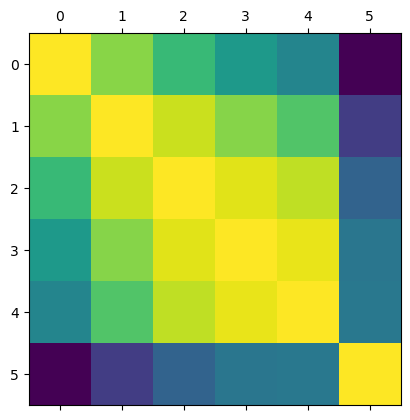

In [25]:
plt.matshow(normalized_features.corr(), )